In [159]:
#Impporting Libraries first

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind  
from statsmodels.stats.proportion import proportions_ztest  
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Part A - 15 Marks

Question 1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order.

As I can observe that 400 people planned to purchase and actually placed an order for Product A is 400 out of 2000 people. 

In [2]:
# AP is the number of people who planned and actually placed an order for Product A
AP = 400
PP  = 2000
PE6 = round(AP / PP,4) 
print('Joint probability of the people who planned to purchase and actually placed an order. is %1.4f' % PE6)

Joint probability of the people who planned to purchase and actually placed an order. is 0.2000


Question 1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase.

P1 = P(Actually placed an order | Planned to purchase)

P2 = Planned to purchase and actually placed an order

P3 = Planned to purchase

In [3]:
P1   = (400 / 2000 )/ (500 / 2000)

print('P(Actually placed an order | Planned to purchase) is %1.4f' % P1) 

P(Actually placed an order | Planned to purchase) is 0.8000


Question 2. An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions. [4 Marks] 

2.A. Probability that none of the items are defective? [1 Mark]

2.B. Probability that exactly one of the items is defective? [1 Mark] 

2.C. Probability that two or fewer of the items are defective? [1 Mark] 2.D. Probability that three or more of the items are defective ? [1 Mark]

In [4]:
p   =  0.05 # failure rate for the manufactured item that the company manufactures is 5%
n   =  10 # sample size
k   =  np.arange(0,11) # An array of quantiles

In [5]:
binomial = stats.binom.pmf(k,n,p)

In [6]:
print(binomial)

[5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
 9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789062e-08
 1.58642578e-09 1.85546875e-11 9.76562500e-14]


2.A. Probability that none of the items are defective

In [7]:
print('A.  Probability that none of the items are defective? is %1.4f' %binomial[0])

A.  Probability that none of the items are defective? is 0.5987


2.B. Probability that exactly one of the items is defective

In [8]:
print('B. Probability that exactly one of the items is defective?  is %1.4f' %binomial[1])

B. Probability that exactly one of the items is defective?  is 0.3151


2.C. Probability that two or fewer of the items are defective

In [9]:
#To answer the question c)  Probability that two or fewer of the items are defective?
#We need to calculate cumulative probability of Upto Two items being defective
cumbinomial = stats.binom.cdf(k,n,p)

In [10]:
print(cumbinomial)

[0.59873694 0.91386164 0.98849644 0.9989715  0.99993631 0.99999725
 0.99999992 1.         1.         1.         1.        ]


In [11]:
print('C. Probability that two or fewer of the items are defective? is %1.4f' %cumbinomial[2])

C. Probability that two or fewer of the items are defective? is 0.9885


2.D. Probability that three or more of the items are defective

To calculate D. Probability that three or more of the items are defective? We need to subtract cumulative Probability upto 2 
defective items from 1.

In [13]:
P = 1- cumbinomial[2]
print('D. Probability that three or more of the items are defective is %1.4f' % P)

D. Probability that three or more of the items are defective is 0.0115


Question3. A car salesman sells on an average 3 cars per week. [3 Marks] 

3.A. What is Probability that in a given week he will sell some cars? [1 Mark]

3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars? [1 Mark]

3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week. [1 Mark]

In [15]:
rate =  3 # which is the mean
n    =  np.arange(0,16)
cumpoisson = stats.poisson.cdf(n,rate)
print(cumpoisson)

[0.04978707 0.19914827 0.42319008 0.64723189 0.81526324 0.91608206
 0.96649146 0.9880955  0.99619701 0.99889751 0.99970766 0.99992861
 0.99998385 0.9999966  0.99999933 0.99999988]


3.A. Probability that in a given week he will sell some cars


In [16]:

#P4 = probability that the salesman sells some cars
P4 = 1 - cumpoisson[0]
print(' Probability that in a given week he will sell some cars is %1.4f' %P4)

 Probability that in a given week he will sell some cars is 0.9502


3.B. Probability that in a given week he will sell 2 or more but less than 5 cars


In [17]:
#Let P5 be the probability that the salesman sells more than 4 cars
P5 = cumpoisson[4] # P(X >=4)
#Let P6 be the probability that the salesman sells more than 1 car
P6 = cumpoisson[1] # P(X >=1)
P = P5- P6 # Prob. that the salesman will sell between 2 and 5 cars
print(' B. Probability that in a given week he will sell 2 or more but less than 5 cars is %1.4f' %P)

 B. Probability that in a given week he will sell 2 or more but less than 5 cars is 0.6161


3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week.

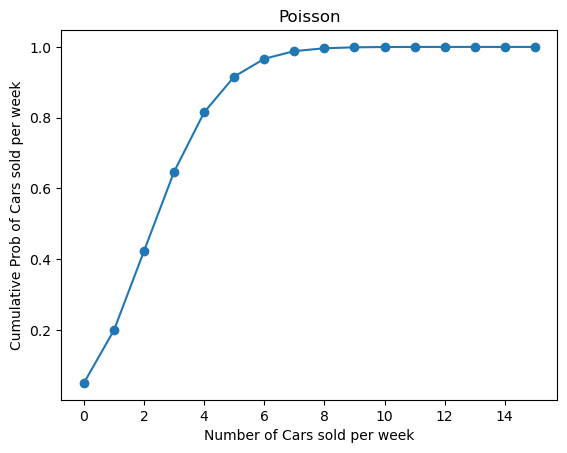

In [18]:
poisson = stats.poisson.cdf(n,rate)
plt.plot(n,poisson, 'o-')
plt.title('Poisson')
plt.xlabel('Number of Cars sold per week')
plt.ylabel('Cumulative Prob of Cars sold per week')
plt.show()

Question 4.Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed,
marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the
percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours
independently place orders with the same bot. Answer the following questions. [3 Marks] 


4.A. What is the probability that all three orders will be recognised correctly? [1 Mark]

4.B. What is the probability that none of the three orders will be recognised correctly? [1 Mark] 

4.C. What is the probability that at least two of the three orders will be recognised correctly? [1 Mark]



In [19]:
#Because there are three orders and the probability of a correct order being recognised is 0.868.
p   =  0.868 # percentage of orders that are taken correctly is 86.8%
n   =  3 # sample size
k   =  np.arange(0,11)

binomial = stats.binom.pmf(k,n,p)
print(binomial)

[0.00229997 0.0453721  0.2983559  0.65397203 0.         0.
 0.         0.         0.         0.         0.        ]


In [20]:
#Question 4.A.
print('The probability that all three orders will be recognised correctly is %1.4f' %binomial[3])

The probability that all three orders will be recognised correctly is 0.6540


In [21]:
#Question 4.B
print('The probability that none of the three orders will be recognised correctly is %1.4f' %binomial[0])

The probability that none of the three orders will be recognised correctly is 0.0023


In [22]:
#Question 4.C  What is the probability that at least two of the three orders will be recognised correctly?

#Let P be the Probability that at least two of the three orders will be recognised correctly

#P1 is the
P1 = binomial[2] #P1 probability when X=2
P2 = binomial[3] #P2 probability when X=3
P = P1+P2
print('The probability that at least two of the three orders will be recognised correctly is %1.4f' %P)


The probability that at least two of the three orders will be recognised correctly is 0.9523


## 5. Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of
Applied Statistics to get data driven business solution. [3 Marks] 

Answer -

Industy : Electrical Component Manufacturing 
Application : Product manufacture and Reliability Test

Problem Statement :
In Electrical products and systems real time data collection is done nowadays. Data comprising of parameters, measurements, temperatures, environmental conditions, failure rates are collected.

Use of Statistics and Probability Theory:
To draw conclusions regarding measurement variability from the data.

To calculate the mean value of the product's nominal settings.

To evaluate the product's dependability/reliability under different circumstances.



## PART B - 30Marks

In [23]:
data = pd.read_csv('DS+-+Part2+-+Basketball.csv')

In [24]:
data.shape

(61, 13)

In [25]:
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")


There are 61 rows and 13 columns.


In [26]:
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [27]:
data.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


## Observations
The dataset contains 61 rows and 13 columns There are 2 integer columns and 11 object type columns. All columns are of type string where as only Tournament and HighestPositionHeld are of type integer But columns like Score, Played Games,WonGames, DrawnGames,Lost Games, BasketScored, BasketGiven, TournamentChampion, Runner-up, HighestPositionHeld should be integer type columns. TeamLaunch column should be a date time column. There are No null/missing values present in the dataset. There are rows or columns with value '-'. These needs to be replaced


According to the dataset analysis, every attribute is quantitative, with the exception of TeamLaunch, which stands for a year. Therefore, we will impute 0 for each and every null or missing field. It is also necessary to clean up the TeamLaunch attribute so that it only contains the specific launch year.

# Data Cleaning

In [29]:
#We need to replace '-' values everywhere

# Replacing all '-' with 0
data.replace(to_replace='-', value=0, inplace=True)

In [30]:
# Correction for TeamLaunch column
data['TeamLaunch'] = data['TeamLaunch'].apply(lambda year: str(year)[:4])

In [31]:
#Converting the datatype of all columns to integer except for TeamName
columns = data.columns
data[columns[1:]] = data[columns[1:]].astype('int64')

In [32]:
#Checking for Duplicate enteries in the data

data.duplicated().sum()

0

In [33]:
#Checking the statistical summary
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Tournament,61.000,24.000,26.827,1.000,4.000,12.000,38.000,86.000
Score,61.000,901.426,1134.899,0.000,96.000,375.000,1351.000,4385.000
PlayedGames,61.000,796.820,876.283,0.000,114.000,423.000,1318.000,2762.000
WonGames,61.000,303.967,406.991,0.000,34.000,123.000,426.000,1647.000
DrawnGames,61.000,188.934,201.799,0.000,24.000,95.000,330.000,633.000
LostGames,61.000,303.754,294.709,0.000,62.000,197.000,563.000,1070.000
BasketScored,61.000,1140.344,1506.740,0.000,153.000,430.000,1642.000,5947.000
BasketGiven,61.000,1140.230,1163.711,0.000,221.000,632.000,1951.000,3889.000
TournamentChampion,61.000,1.426,5.473,0.000,0.000,0.000,0.000,33.000
Runner-up,61.000,1.410,4.540,0.000,0.000,0.000,0.000,25.000


# Observations:

1.Tournament: Average number of tournaments played is 24 by any team with Maximum tournaments played is 86 and minimum played is 1 

2.Score: Average score of the all the teams is 901. The maximum score by any team is 4385 while the minimum score by any team is 1. There is huge difference between the 75% percentile of the data and the maximum value which indicates there could be outliers present in this column 

3.Played Games: Average games played is 786 with maximum as 2762 nd minimum 0. 

4.WonGames : The average number of wongames is 406.

5.DrawnGames : The average number of drawngames is 188.

6.LostGames : The average number of Lostgames is 303.

7.Basket scored: The average number of Basketscored is 1140. There is huge difference between the 75% percentile of the data and the maximum value which indicates there could be outliers present in this column 

8.Basketgiven: The average number of Basketgiven is 1140

Additional Features: Since in sports there will be instances when a particular would be cancelled or abandoned.
Let's take some of the current characteristics and derive the following ones for better understanding.

1.Cancelled Game: Total number of games played but no official results yet announced. These are the games that might have been canceled or withdrawn without indicating a win, loss, or draw.

2.SuccessPercentage: Percentage of the games wonned by the team.

3.LosingPercentage:  Percentages of games lost by the team.

4.SuccessRatio: Games won/Games lost ratio 

5.BasketRatio: Basketsscored/Baskets given.

In [40]:
# Add CancelledGames features
# data.drop('CancelledGames', axis=1, inplace=True)
n_cancelled = data['PlayedGames'] - (data['DrawnGames'] + data['WonGames'] + data['LostGames'])
data.insert(loc=7, column='CancelledGames', value=n_cancelled)
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,0,4631,3700,8,7,1929,1


In [44]:
data.drop(['SuccessPercentage' ],axis=1, inplace=True)

In [45]:
# Add SuccessPercentage features
# data.drop('SuccessPercentage', axis=1, inplace=True)
won_pct = data['WonGames'] / data['PlayedGames']*100
data.insert(loc=5, column='SuccessPercentage', value=won_pct)
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,SuccessPercentage,DrawnGames,LostGames,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,59.631,552,563,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,57.241,573,608,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,47.475,598,775,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,44.557,616,861,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,43.773,633,920,0,4631,3700,8,7,1929,1


In [47]:
Success_percent_max = data['SuccessPercentage'].max()
Best_Team = data.loc[data['SuccessPercentage'] == Success_percent_max , 'Team'].item()

print("The best performing team is %s with the winning percentage of %1.2f" %(Best_Team, Success_percent_max))

The best performing team is Team 1 with the winning percentage of 59.63


In [48]:
# Add LoosingPercentage features
# data.drop('LoosingPercentage', axis=1, inplace=True)
won_pct = data['LostGames'] / data['PlayedGames']*100
data.insert(loc=8, column='LoosingPercentage', value=won_pct)
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,SuccessPercentage,DrawnGames,LostGames,LoosingPercentage,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,59.631,552,563,20.384,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,57.241,573,608,22.013,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,47.475,598,775,29.648,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,44.557,616,861,32.320,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,43.773,633,920,33.309,0,4631,3700,8,7,1929,1


In [51]:
Loosing_percent_max = data['LoosingPercentage'].max()
Worst_Team = data.loc[data['LoosingPercentage'] == Loosing_percent_max , 'Team'].item()

print("The worst performing team is %s with the loosing percentage of %1.2f" %(Worst_Team, Loosing_percent_max))

The worst performing team is Team 60 with the loosing percentage of 70.00


In [50]:
# Add SuccessRatio features
# data.drop('SuccessRatio', axis=1, inplace=True)
won_pct = data['WonGames'] / data['LostGames']
data.insert(loc=9, column='SuccessRatio', value=won_pct)
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,SuccessPercentage,DrawnGames,LostGames,LoosingPercentage,SuccessRatio,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,59.631,552,563,20.384,2.925,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,57.241,573,608,22.013,2.600,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,47.475,598,775,29.648,1.601,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,44.557,616,861,32.320,1.379,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,43.773,633,920,33.309,1.314,0,4631,3700,8,7,1929,1


In [52]:
# Add DrawnPercentage features
# data.drop('DrawnPercentage', axis=1, inplace=True)
won_pct = data['DrawnGames']/data['PlayedGames']*100
data.insert(loc=5, column='DrawnPercentage', value=won_pct)
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnPercentage,SuccessPercentage,DrawnGames,LostGames,LoosingPercentage,SuccessRatio,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,19.986,59.631,552,563,20.384,2.925,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,20.746,57.241,573,608,22.013,2.600,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,22.877,47.475,598,775,29.648,1.601,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,23.123,44.557,616,861,32.320,1.379,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,22.918,43.773,633,920,33.309,1.314,0,4631,3700,8,7,1929,1


In [55]:
Drawn_percent_max = data['DrawnPercentage'].max()
Drawn_Team = data.loc[data['DrawnPercentage'] == Drawn_percent_max , 'Team'].item()

print("The %s is the team with highest number of drawn games with Drawn percentage of %1.2f" %(Drawn_Team, Drawn_percent_max))

The Team 46 is the team with highest number of drawn games with Drawn percentage of 38.60


# Univariate Analysis - To check individual distribution- Skewness

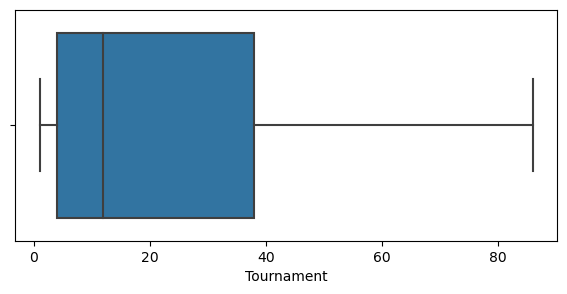

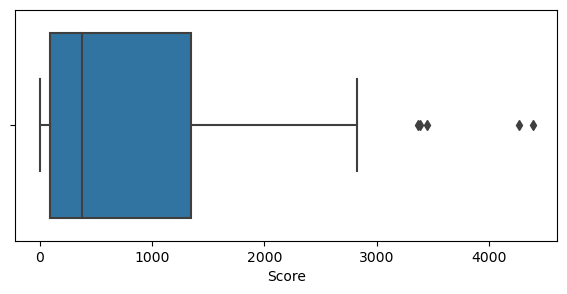

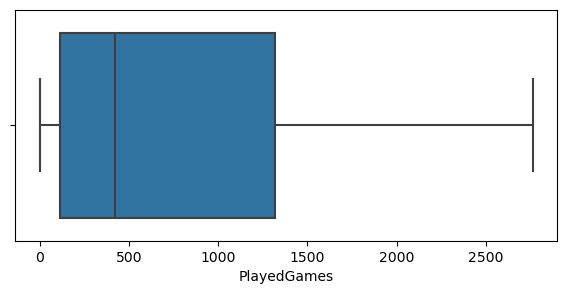

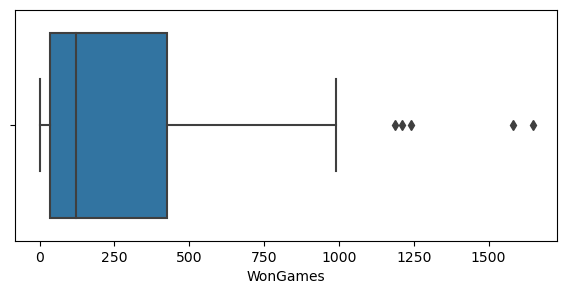

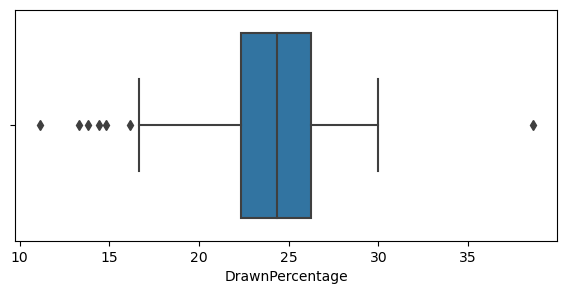

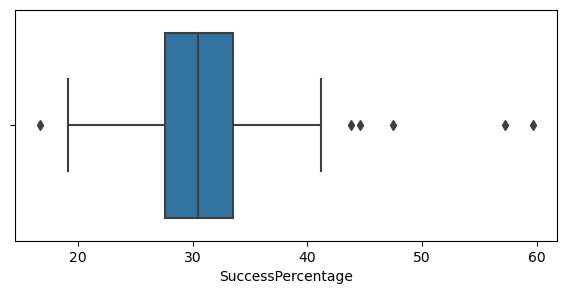

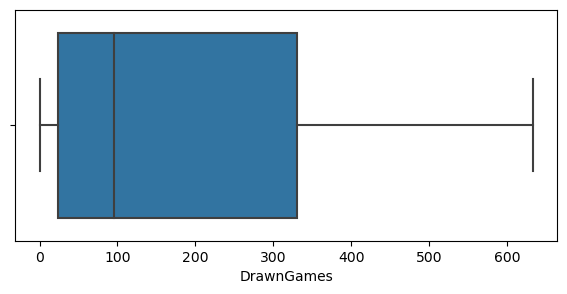

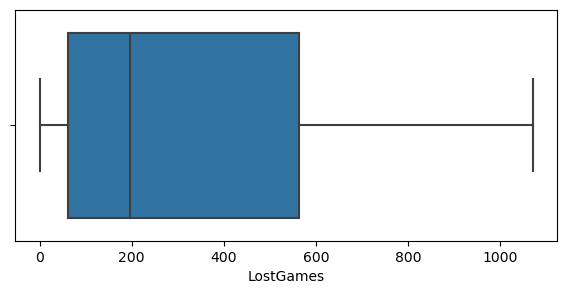

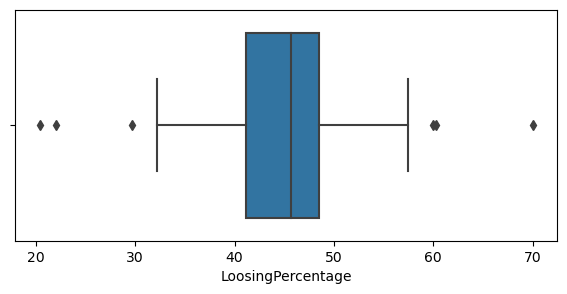

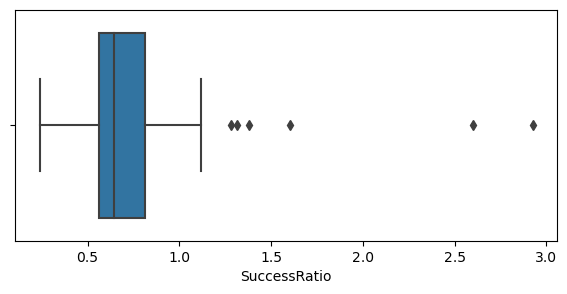

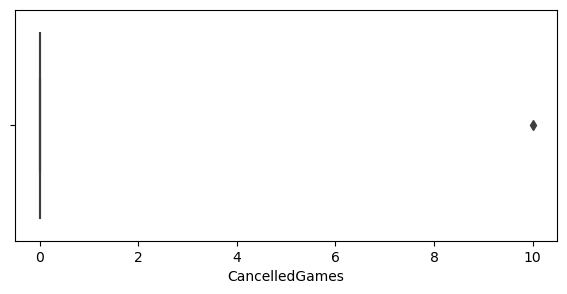

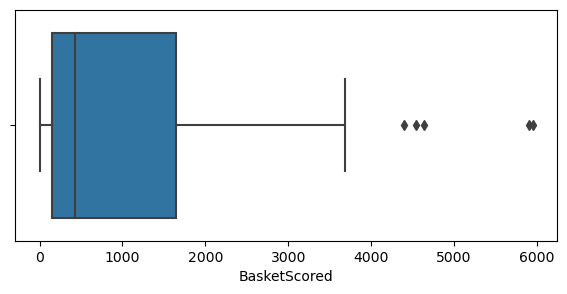

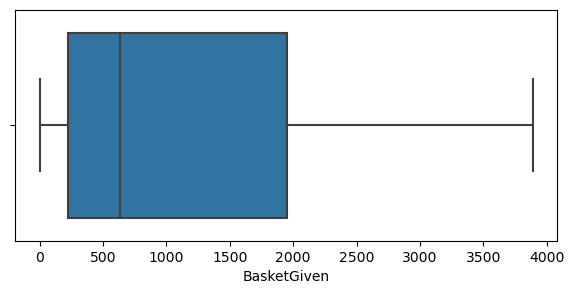

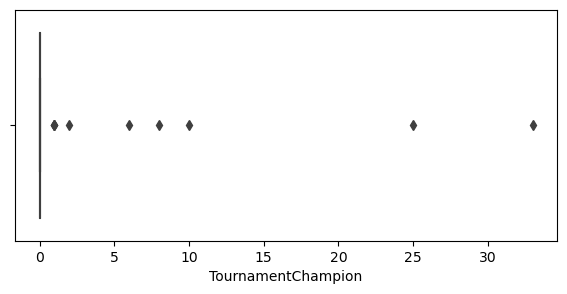

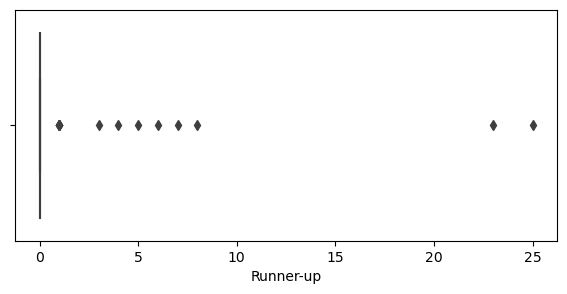

In [79]:
#Creating Boxplot to outliers

for column in data.columns[1:16]:  
    plt.figure(figsize=(7,3))
    sns.boxplot(x=column, data=data);  


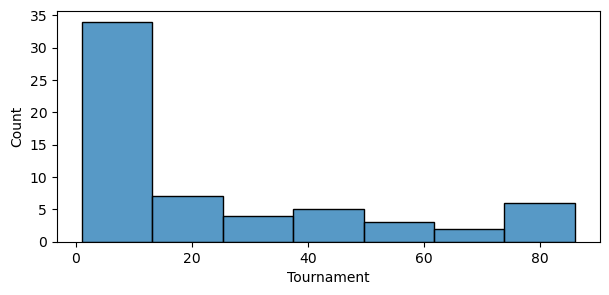

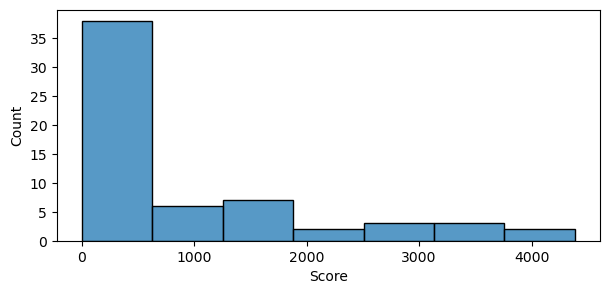

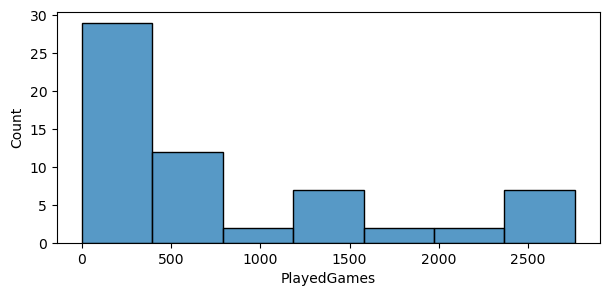

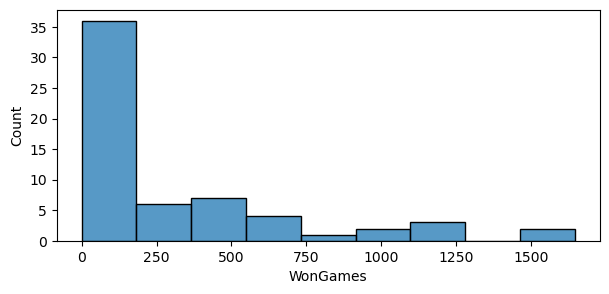

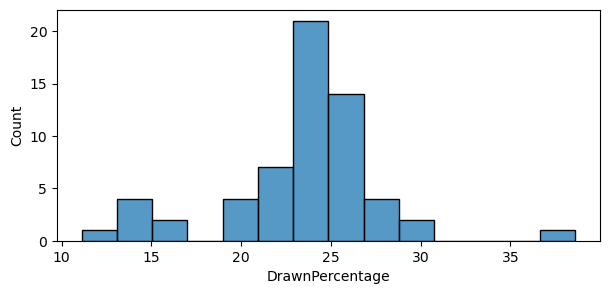

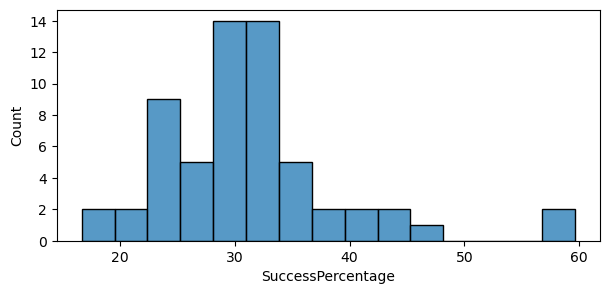

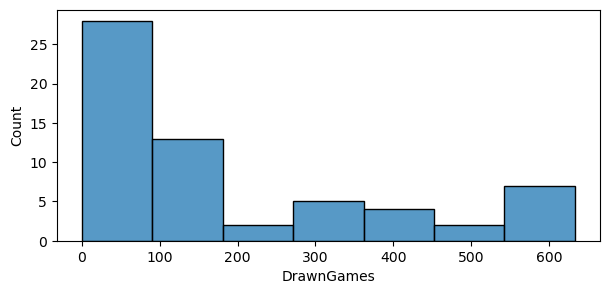

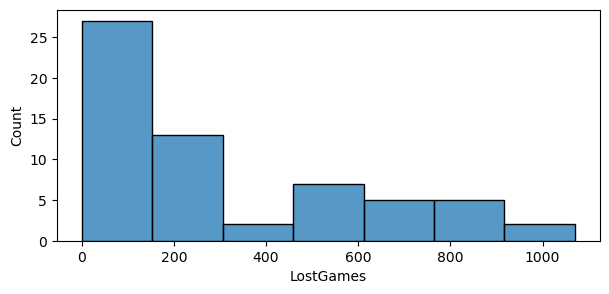

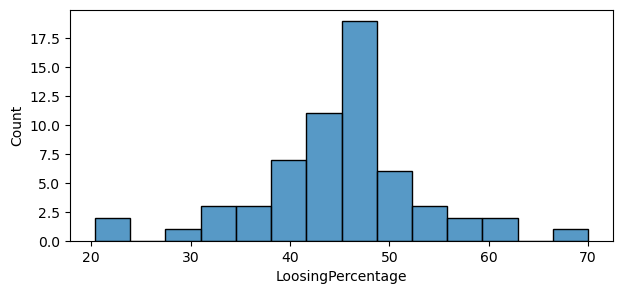

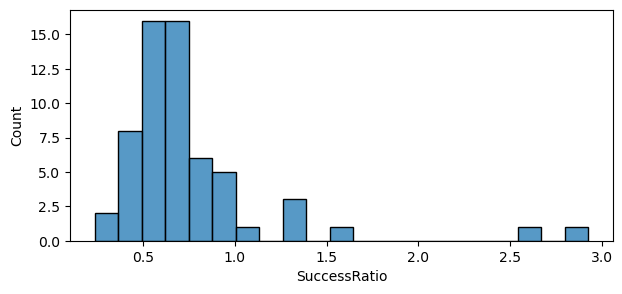

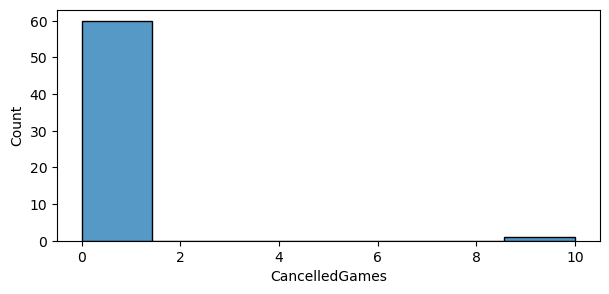

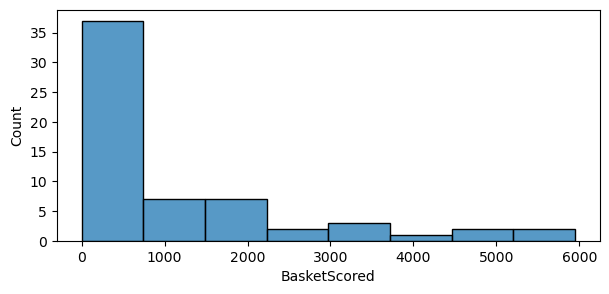

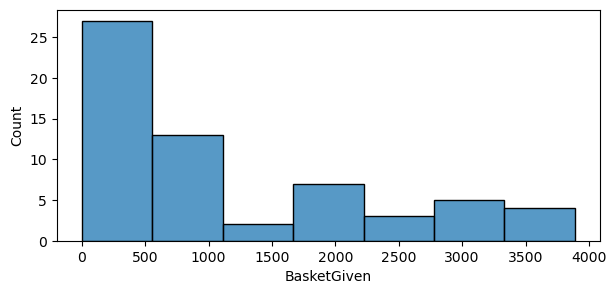

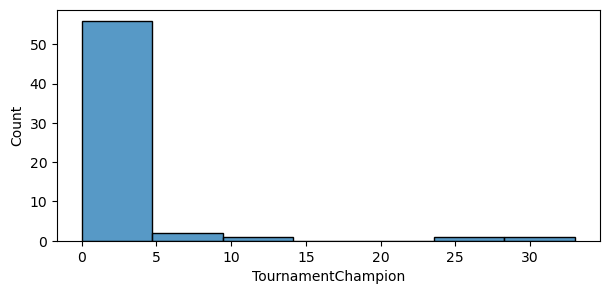

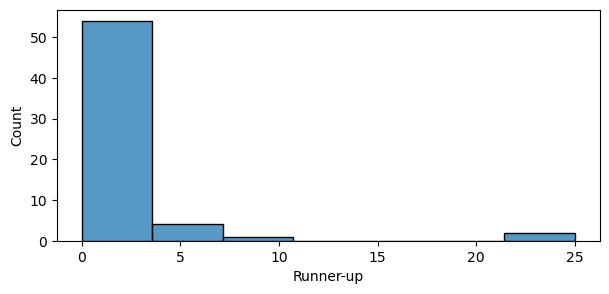

In [80]:
#Creating histograms 
for column in data.columns[1:16]:  
    plt.figure(figsize=(7,3))
    sns.histplot(x=column, data=data); 
 

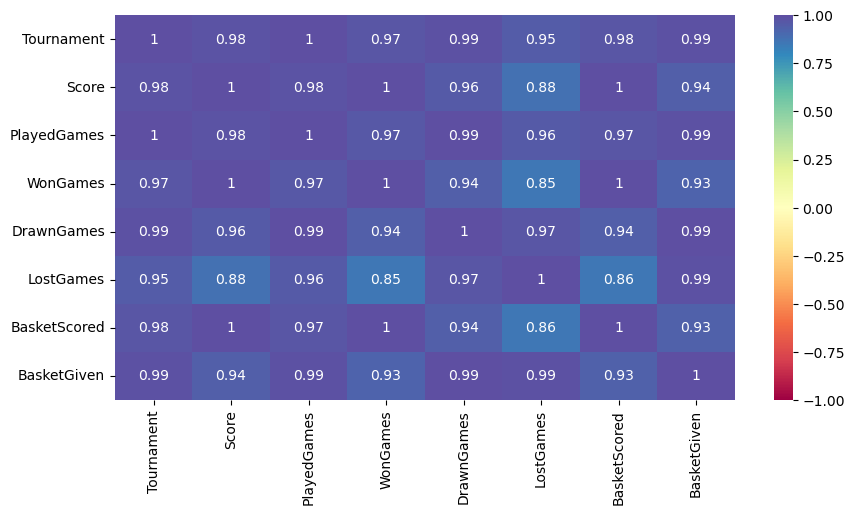

In [85]:
plt.figure(figsize=(10,5))
  
numerical_columns = ['Tournament','Score','PlayedGames','WonGames','DrawnGames','LostGames' , 'BasketScored' , 'BasketGiven'
]

sns.heatmap(data[numerical_columns].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

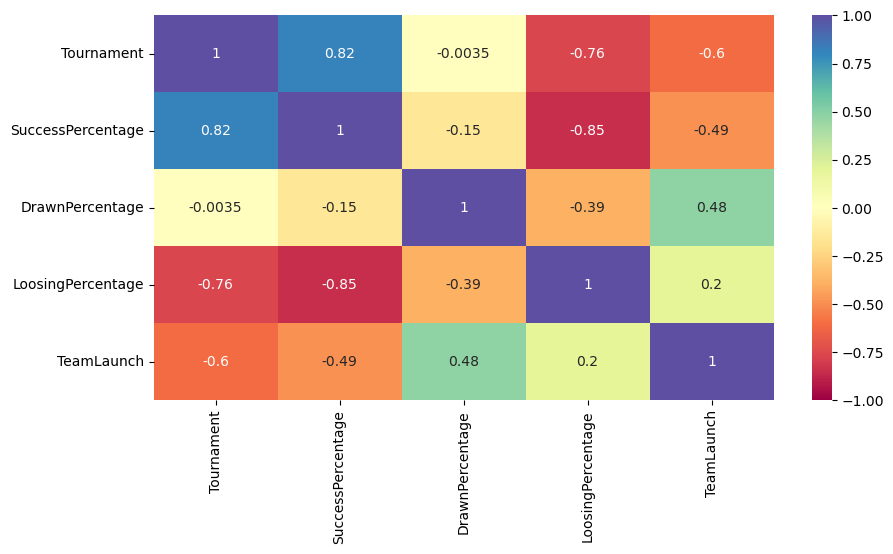

In [86]:
plt.figure(figsize=(10,5))
  
numerical_columns = ['Tournament','SuccessPercentage','DrawnPercentage','LoosingPercentage', 'TeamLaunch'
                    ]
sns.heatmap(data[numerical_columns].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

# Observation

There is a strong correlation between Tournaments played and Success Percentage. This means the tournament champions and the Runnerups are the teams that are the most experienced team with most of number of success/wins.

# Question 3 -
Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future. At-least 1 suggestion for each point

Quantity: Suggestions for enhancing the Quantity of data
For a more examination, data on more matches played in the past would be a fantastic resource.

Velocity: One can ask for increasing the frequency and velocity of data collection.
More details regarding the different matches played over the years could improve the analysis of the data.


Variety: Recommendations for enhancing the range and kind of data sources that are now accessible
Location of games, player information, tournaments, and games would all be valuable additions. The collected Data is very skewed in different segments. 


Truthfulness: Proposed enhancements to the data quality
Dates of team registration could coincide with the launch date of the team. 

Value: Suggestions for enhancements to the value addition
There is a wide range of data collecting available for comprehensive team, player, and game performance.

## Part C - Total 30 marks

<b>DOMAIN: Startup ecosystem</b>

<p> CONTEXT: Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience, present in person and online.</p>
    
<b>DATA DESCRIPTION</b>: CompanyX_EU.csv - Each row in the dataset is a Start-up company and the columns describe the company. 

<b>DATA DICTIONARY:</b>
1. Startup: Name of the company
2. Product: Actual product
3. Funding: Funds raised by the company in USD
4. Event: The event the company participated in
5. Result: Described by Contestant, Finalist, Audience choice, Winner or Runner up
6. OperatingState: Current status of the company, Operating ,Closed, Acquired or IPO

<b>PROJECT OBJECTIVE:</b> Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the below steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw conclusions from the dataset


# 1. Read the CSV File


In [113]:
# Importing data from local
company = pd.read_csv("CompanyX_EU.csv")

# 2. Data Exploration:

A. Check the datatypes of each attribute.
B. Check for null values in the attributes.

In [114]:
company.shape

(662, 6)

In [115]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [177]:
company.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [117]:
company.tail()

,Startup,Product,Funding,Event,Result,OperatingState
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating
661,Zumper,zumper.com,$31.5M,Disrupt SF 2012,Finalist,Operating


### B. Check for null values in the attributes.

Observation from the above data.info() The columns Product and Funding have null values. Calculating how many below:

In [118]:
company['Product'].isnull().sum()

6

In [95]:
company['Funding'].isnull().sum()

214

## 3. Data preprocessing & visualisation: [4 Marks]
A. Drop the null values. [1 Mark]

B. Convert the ‘Funding’ features to a numerical value

In [119]:
#A. 

company_1 =company.dropna()
company_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         446 non-null    object
 1   Product         446 non-null    object
 2   Funding         446 non-null    object
 3   Event           446 non-null    object
 4   Result          446 non-null    object
 5   OperatingState  446 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [196]:
company_1.loc[:, 'Funds_in_million'] = company_1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1]) if x[-1] != 'B' else float(x[1:-1])*1000))
company_1

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.630
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.000
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.300
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.000
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.800
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.000
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.000
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,223.000
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,3.400


In [197]:
#B.

company_1 = company_1.copy()

company_1["Funding"] = company_1["Funding"].astype(str)


In [198]:
company_1

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.630
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.000
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.300
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.000
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.800
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.000
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.000
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,223.000
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,3.400


### 3. C. Plot box plot for funds in million. [1 Mark]

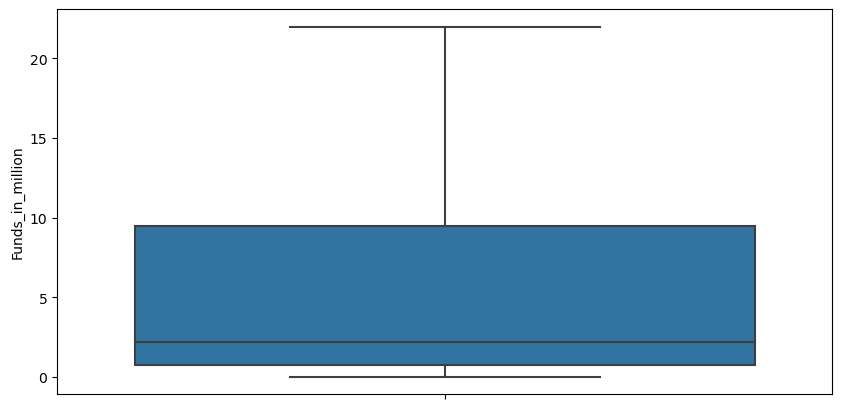

In [199]:
plt.figure(figsize=(10,5))
sns.boxplot(data=company_1,y='Funds_in_million',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

### D. Check the number of outliers greater than the upper fence. [1 Mark]
E. Check frequency of the OperatingState features classes. 

In [200]:
#The upper fence of the box plot is given by
#Upper_fence = Q3 + (1.5 * IQR)

Q1 = np.percentile(company_1["Funds_in_million"],25)
Q3 = np.percentile(company_1["Funds_in_million"],75)
IQR = Q3-Q1
Upper_fence = Q3 + (1.5 * IQR)
print("The value of the upper fence of the box plot = %1.4f" %Upper_fence)

The value of the upper fence of the box plot = 22.5696


###  E. Check frequency of the OperatingState features classes. [1 Mark]

In [201]:
company_1['OperatingState'].value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

## 4. Statistical Analysis: [10 Marks]
A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? [1 Mark]

B. Write the null hypothesis and alternative hypothesis. [1 Mark]

C. Test for significance and conclusion [1 Mark]

D. Make a copy of the original data frame. [1 Mark]

E. Check frequency distribution of Result variables. [1 Mark]

F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating [1 Mark]

G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: [2 Mark]

H. Test for significance and conclusion [1 Mark]

I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards. [1 Mark]

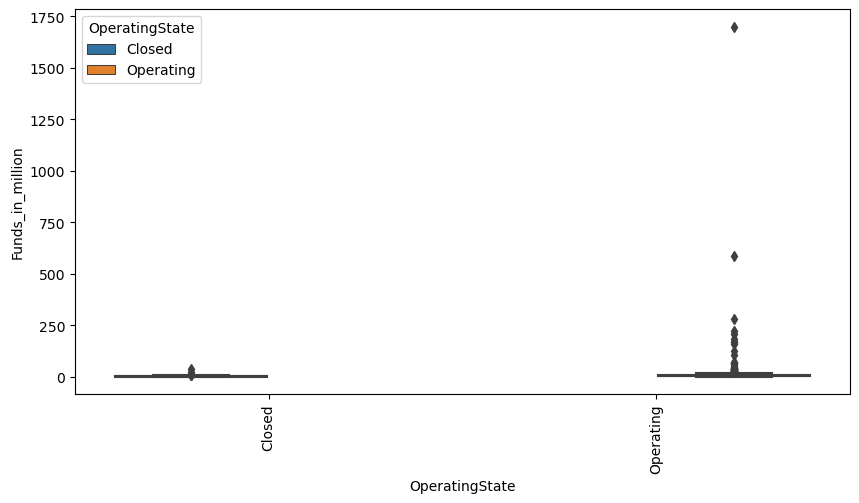

In [202]:
#A. 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=company_1[company_1['OperatingState'].isin(['Operating', 'Closed'])], x='OperatingState', y='Funds_in_million', hue="OperatingState")
plt.xticks(rotation=90)
plt.show()
            

### Observation :

Funding for closed companies is significantly less than the ones that are still operating (Operating have on an average 2 Millions more funding than the clsoed ones)


### B. Write the null hypothesis and alternative hypothesis. [1 Mark

In [203]:
h0="Funding for Operating companies is same as closed companies"
h1 ="Funding for Operating companies is not the same as closed companies"

### C. Test for significance and conclusion [1 Mark]

In [204]:
arr_Operating =np.array(company_1[company_1['OperatingState'] == 'Operating']['Funds_in_million'])
arr_Closed =np.array(company_1[company_1['OperatingState'] == 'Closed']['Funds_in_million'])

ttest_ind(arr_Closed, arr_Operating)


Ttest_indResult(statistic=-1.1382924515740138, pvalue=0.25572701885629406)

As here we can see that the p-value is greater than 5% (Assuming level of significance at 5%) We fail to reject the Null HYpothesis. Hence we can't conclude if there is any significant difference between the funding of closed and operating companies.

### D. Make a copy of the original data frame. [1 Mark]

In [205]:
company_copy = company.copy()
company_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


### E. Check frequency distribution of Result variables. [1 Mark]

<Axes: xlabel='Result', ylabel='count'>

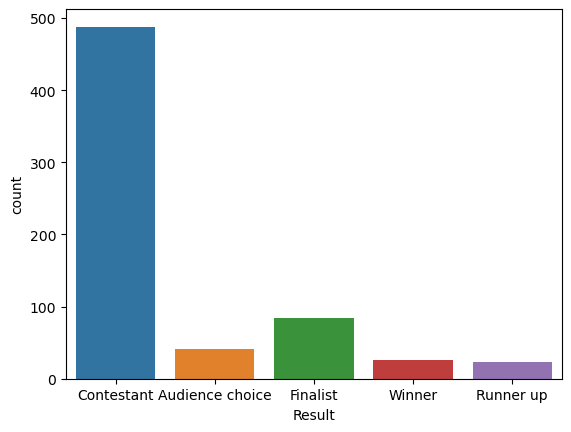

In [206]:
sns.countplot(data=company_copy, x="Result")

### F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating [1 Mark]


In [207]:
winners=company_copy [company_copy['Result'] == 'Winner']
winners.shape 

(26, 6)

In [208]:
contestants=company_copy [company_copy['Result'] == 'Contestant']
contestants.shape 

(488, 6)

In [209]:
winners['OperatingState'].value_counts()

Operating    19
Acquired      7
Name: OperatingState, dtype: int64

In [210]:
contestants['OperatingState'].value_counts()

Operating    332
Closed        90
Acquired      62
Ipo            4
Name: OperatingState, dtype: int64

In [211]:
#winners still operating 
winner_operatingPercentage= (winners['OperatingState'].value_counts()['Operating']/winners.shape[0])*100

print ('Percentage of winners still operating is : % 1.2f' % winner_operatingPercentage)
      

Percentage of winners still operating is :  73.08


In [212]:
#contestants still operating 
contestant_OperatingPercentage= (contestants['OperatingState'].value_counts()['Operating']/contestants.shape[0])*100
print ('Percentage of Contestants still operating is : % 1.2f' % contestant_OperatingPercentage)


Percentage of Contestants still operating is :  68.03


### G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: [2 Mark]

H0 = percentage of contestants operating is equal to percentage of winners operating 

H1 = percentage of contestants operating is not equal to percentage of winners operating 

### H. Test for significance and conclusion [1 Mark]

In [213]:
from statsmodels.stats.proportion import proportions_ztest    
nContestants=contestants.shape[0]
nWinners=   winners.shape[0]
winner_operatingRatio =round( winners['OperatingState'].value_counts()['Operating']/winners.shape[0],2)
contestant_OperatingRatio =round(contestants['OperatingState'].value_counts()['Operating']/contestants.shape[0],2)

print(nContestants)
print(nWinners)
print(winner_operatingRatio)
print(contestant_OperatingRatio)

488
26
0.73
0.68


In [214]:

# Perform the z-test
stat, p_value = proportions_ztest([winner_operatingRatio, contestant_OperatingRatio], [nWinners, nContestants])

# Print the results
print("Z-statistic: {stat}")
print("P-value: {p_value}")

Z-statistic: {stat}
P-value: {p_value}


Concluding Statements:
Since the p-value is greater than 0.05 we fail to reject the null hypothesis.

Hence we can say that there is no significant difference  between the percentage of contestants operating and percentage of winners operating. 

### I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards.

In [228]:
# This is a user-defined function for converting the present entries of 
def year_filter(event):  
    # separate out the year part    
  
    return event[-4:]   

In [230]:
# Another column of Year is created from the event column which shall be used as filter

company["Year"] = company["Event"].apply(year_filter)

(company.head())


,Startup,Product,Funding,Event,Result,OperatingState,Year
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating,2013
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,2013
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating,2016
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,2016
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating,2013


In [235]:
#Filtering out the company that contains disrupt and occured from 2013 onwards
company = company[(company['Event'].str.contains("Disrupt")) & (company['Year'] >= 2013)]
company.head()

,Startup,Product,Funding,Event,Result,OperatingState,Year
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating,2013.000
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,2013.000
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating,2016.000
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,2016.000
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating,2013.000
